Aim: Apply spatial filter to the given image

In [ ]:
from scipy import signal
from skimage import io
import matplotlib.pyplot as plt 
import numpy as np
image=io.imread('/content/peppers.png')

In [ ]:

sh=image.shape
rows=sh[0]
cols=sh[1]
mean,std_deviation=0,50
gaussian_noise=np.random.normal(mean,std_deviation,(rows,cols)) # generates gaussian noise, more the standard deviation more the noise

In [ ]:
image_noisy=image.copy()
# Adding gaussian noise to different planes(r,g,b) of the image
image_noisy[:,:,0] = image[:,:,0] + gaussian_noise
image_noisy[:,:,1] = image[:,:,1] + gaussian_noise
image_noisy[:,:,2] = image[:,:,2] + gaussian_noise

In [ ]:
#averaging filter
size=15 #variable for size of filter, when size of filter is increased noise is reduced more
a_filter=(np.ones((size,size)))*(1/(size*size)) # np.ones generates matrix of 1s
image_avg_filtered=image_noisy.copy()
image_avg_filtered[:,:,0]=signal.convolve2d(image_noisy[:,:,0],a_filter,mode='same') # mode='same' to retain the same size of the image as the original image
image_avg_filtered[:,:,1]=signal.convolve2d(image_noisy[:,:,1],a_filter,mode='same')
image_avg_filtered[:,:,2]=signal.convolve2d(image_noisy[:,:,2],a_filter,mode='same')

Text(0.5, 1.0, 'Image After Average Filter')

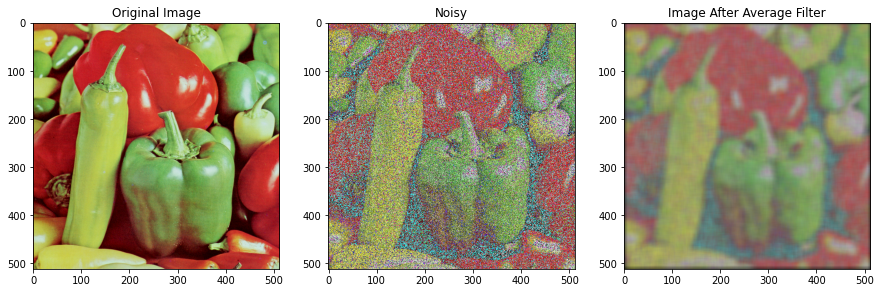

In [ ]:
plt.figure(figsize=(15,15))
plt.subplot(1,3,1)
plt.imshow(image, cmap = 'gray')
plt.title ('Original Image')
plt.subplot(1,3,2)
plt.imshow(image_noisy, cmap = 'gray')
plt.title ('Noisy')
plt.subplot(1,3,3)
plt.imshow(image_avg_filtered, cmap = 'gray')
plt.title ('Image After Average Filter')


In [ ]:
# Median Filter
# We add salt and pepper noise and thus we will covert image to gray image so we can see its effect better
from skimage.color import rgb2gray
from random import seed,randint # to get random numbers
im=io.imread('/content/watch (2).png')
image_gray=rgb2gray(im)
sh=image_gray.shape
print(sh)


(768, 1024)


In [ ]:
rows=sh[0]
cols=sh[1]
image_sp_noisy=image_gray.copy()
sp_proportion=0.5 # variable to show what proportion of pixels we want to convert to salt and pepper noise
sp_numb_pixels=int(sp_proportion*rows*cols)
sp_noise=1
seed(25)




In [ ]:
sp=1
for i in range(sp_numb_pixels):
  temp1=randint(0,rows-1)
  temp2=randint(0,cols-1)
  image_sp_noisy[temp1][temp2]=sp
  if sp==1:
    sp=0
  else:
    sp=1

In [ ]:
image_sp_filtered=image_sp_noisy.copy()
size=7
mask_center=int((size-1)/2)
med_location=int((((size*size)-1)/2))
for r in range(0,rows-size): # We do not process last 3 rows since no of rows in image might not be a multiple of 3 
  for c in range(0,cols-size):
    temp1 = image_sp_noisy[r:r+size,c:c+size]
    temp2 = np.reshape(temp1,(1,size*size))
    temp3 = np.sort(temp2)
    image_sp_filtered[r+mask_center,c+mask_center] = temp3[0][med_location]

Text(0.5, 1.0, 'Image After Median Filter')

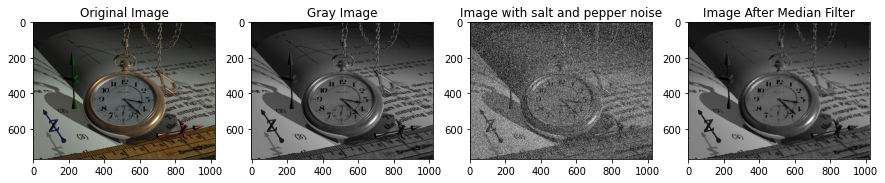

In [ ]:
plt.figure(figsize=(15,15))
plt.subplot(1,4,1)
plt.imshow(im, cmap = 'gray')
plt.title ('Original Image')
plt.subplot(1,4,2)
plt.imshow(image_gray, cmap = 'gray')
plt.title ('Gray Image')
plt.subplot(1,4,3)
plt.imshow(image_sp_noisy, cmap = 'gray')
plt.title ('Image with salt and pepper noise')
plt.subplot(1,4,4)
plt.imshow(image_sp_filtered, cmap = 'gray')
plt.title ('Image After Median Filter')

Conclusion: The given image is added with gaussian noise of std deviation 20 and mean value 0. To reduce the noise of the image avg filter of size 11x11 is applied. Image shows that noise is reduced and image is blurry. If std deviation is increaed to 50 the avg filer of size 11X11 is not effective. If filter size is icreased to 15x15, then the noise is reduced but image is blurry.


Given image is added with salt and pepper noise at 20% of the total no of pixel locations. if median filter of size 3x3 is used, all the pixels with salt and pepper noise are cleaned. If 50% of the pixels are affected by salt and pepper noise then filtered image shows more no of noisy pixels. If filter size is increased to 7x7 then the effect of noise is reduced further